In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

The dataset is downloaded from https://www.kaggle.com/tmdb/tmdb-movie-metadata

In [165]:
credits_df = pd.read_csv('./data/tmdb_5000_credits.csv')
movies_df = pd.read_csv('./data/tmdb_5000_movies.csv')

Now we need to merge the two dataset on column 'id'

In [166]:
credits_df.rename(columns = {'movie_id':'id'},inplace=True)

In [167]:
dataset = pd.merge(credits_df,movies_df,on='id')

It is always a better choice to remove columns which do not add much value to our analysis

In [168]:
dataset.drop(['title_x','homepage','id','cast','crew','budget','genres','keywords','original_language','original_title','overview','production_companies','production_countries','release_date','revenue','runtime','spoken_languages','status','tagline'],axis=1,inplace=True)

Now we use the weighted average formula to find the weighted average for each movie

In [169]:
R = dataset['vote_average'] #average value for a movie between 0 and 1
v = dataset['vote_count'] #number of votes per movie
c = dataset['vote_average'].mean() # the mean vote across all report
m = dataset['vote_count'].quantile(0.70) # minimum number of votes required to be eligible for top 100 imdb movies


In [170]:
dataset['weighted_average'] = (R*v +c*m)/(c+m)

In [171]:
dataset_sorted = dataset.sort_values('weighted_average',ascending=False)
top_10_movies_using_weighted_average = dataset_sorted.head(10)

In [172]:
top_10_movies_using_weighted_average

,popularity,title_y,vote_average,vote_count,weighted_average
96,167.583710,Inception,8.1,13752,195.762705
65,187.322927,The Dark Knight,8.2,12002,173.662598
95,724.247784,Interstellar,8.1,10867,155.958904
16,144.448633,The Avengers,7.4,11776,154.459480
0,150.437577,Avatar,7.2,11800,150.742176
788,514.569956,Deadpool,7.4,10995,144.615370
287,82.121691,Django Unchained,7.8,10099,140.202434
662,146.757391,Fight Club,8.3,9413,139.104992
94,481.098624,Guardians of the Galaxy,7.9,9742,137.118762
634,104.309993,The Matrix,7.9,8907,125.882877


[]

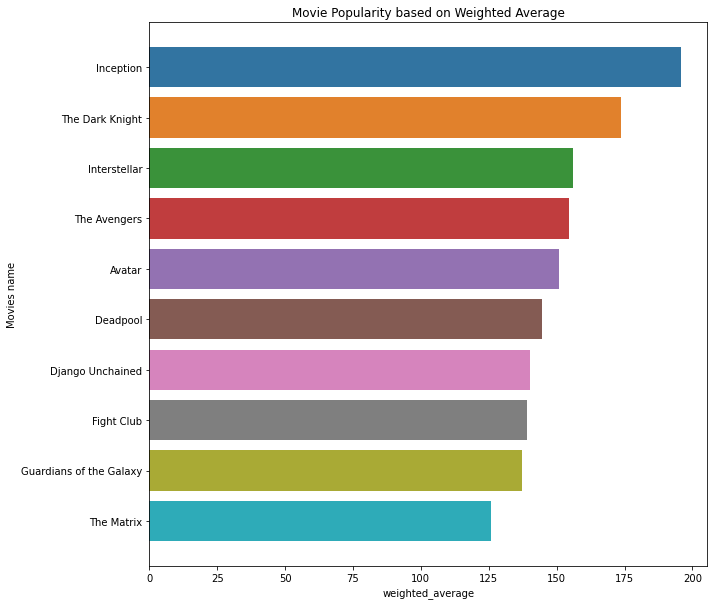

In [176]:
plt.figure(figsize=(10,10))
sns.barplot(x='weighted_average',y='title_y',data=top_10_movies_using_weighted_average)
plt.xlabel('weighted_average')
plt.ylabel('Movies name')
plt.title("Movie Popularity based on Weighted Average")
plt.plot()

Now we check the top 10 movies based on their popularity score

In [177]:
dataset_sorted = dataset.sort_values('popularity',ascending=False)
top_10_movies_based_on_popularity = dataset_sorted.head(10)

In [178]:
top_10_movies_based_on_popularity

,popularity,title_y,vote_average,vote_count,weighted_average
546,875.581305,Minions,6.4,4571,55.858268
95,724.247784,Interstellar,8.1,10867,155.958904
788,514.569956,Deadpool,7.4,10995,144.615370
94,481.098624,Guardians of the Galaxy,7.9,9742,137.118762
127,434.278564,Mad Max: Fury Road,7.2,9427,121.640102
28,418.708552,Jurassic World,6.5,8662,101.930420
199,271.972889,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,95.261110
82,243.791743,Dawn of the Planet of the Apes,7.3,4410,60.863615
200,206.227151,The Hunger Games: Mockingjay - Part 1,6.6,5584,68.803424
88,203.734590,Big Hero 6,7.8,6135,87.537450


[]

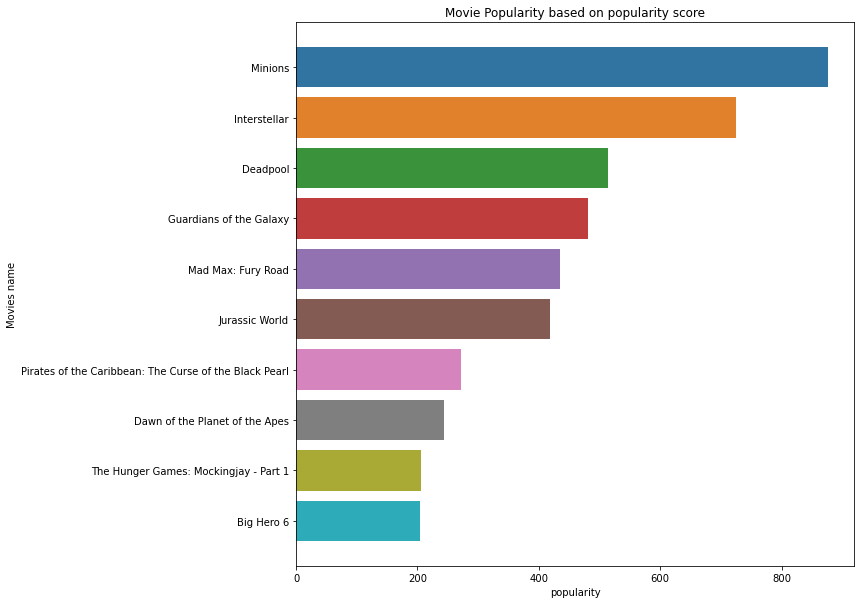

In [179]:
plt.figure(figsize=(10,10))
sns.barplot(x='popularity',y='title_y',data=top_10_movies_based_on_popularity)
plt.xlabel('popularity')
plt.ylabel('Movies name')
plt.title("Movie Popularity based on popularity score")
plt.plot()

Now we can combine both weighted average and popularity to find the score for each movie

We need to first scale both popularity and weighted_average so that they are on the same scale

In [180]:
scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(dataset[['popularity','weighted_average']])
dataset_scaled_norm = pd.DataFrame(dataset_scaled,columns=['popularity','weighted_average'])

In [181]:
dataset_scaled_norm

,popularity,weighted_average
0,0.171815,0.762717
1,0.158846,0.278747
2,0.122635,0.252585
3,0.128272,0.621284
4,0.050169,0.116314
...,...,...
4798,0.016298,0.014102
4799,0.000734,0.000265
4800,0.001650,0.000377
4801,0.000979,0.000358


In [182]:
dataset[['popularity_norm','weighted_average_norm']] = dataset_scaled_norm[['popularity','weighted_average']]

In [183]:
dataset

,popularity,title_y,vote_average,vote_count,weighted_average,popularity_norm,weighted_average_norm
0,150.437577,Avatar,7.2,11800,150.742176,0.171815,0.762717
1,139.082615,Pirates of the Caribbean: At World's End,6.9,4500,58.916731,0.158846,0.278747
2,107.376788,Spectre,6.3,4466,53.952945,0.122635,0.252585
3,112.312950,The Dark Knight Rises,7.6,9106,123.907548,0.128272,0.621284
4,43.926995,John Carter,6.1,2124,28.097720,0.050169,0.116314
...,...,...,...,...,...,...,...
4798,14.269792,El Mariachi,6.6,238,8.704513,0.016298,0.014102
4799,0.642552,Newlyweds,5.9,5,6.079202,0.000734,0.000265
4800,1.444476,"Signed, Sealed, Delivered",7.0,6,6.100493,0.001650,0.000377
4801,0.857008,Shanghai Calling,5.7,7,6.096916,0.000979,0.000358


In [184]:
dataset['score'] = 0.5*dataset['popularity_norm'] + 0.5*dataset['weighted_average_norm']

In [185]:
dataset_sort = dataset.sort_values('score',ascending=False)
top_10_movies_based_on_score = dataset_sort.head(10)

[]

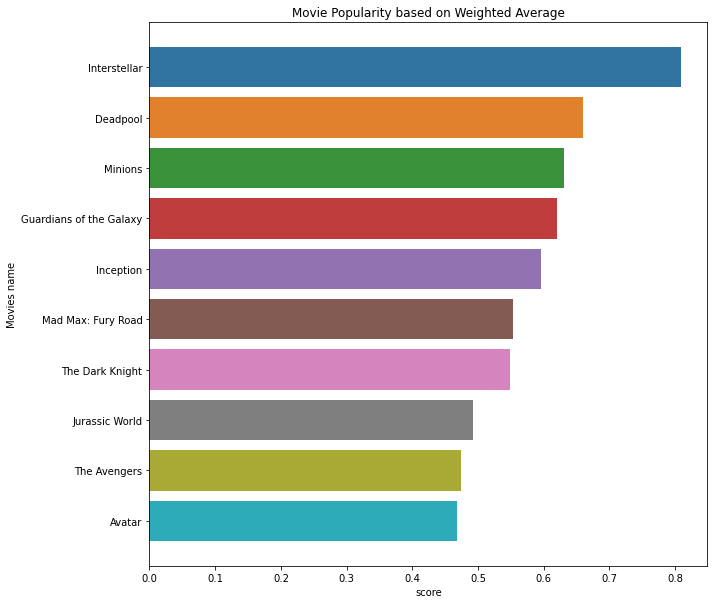

In [186]:
plt.figure(figsize=(10,10))
sns.barplot(x='score',y='title_y',data=top_10_movies_based_on_score)
plt.xlabel('score')
plt.ylabel('Movies name')
plt.title("Movie Popularity based on Weighted Average")
plt.plot()